<a href="https://colab.research.google.com/github/limdiny/ML/blob/main/%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EB%AA%A8%EB%8D%B8_%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신경망 모델 훈련
* 드롭아웃

은닉층에 있는 뉴런의 출력을 랜덤하게 꺼서 과대적합을 막는 기법이다. 드롭아웃은 훈련중에 적용되며 평가나 예측에서는 적용하지 않는다. 텐서플로에서는 자동으로 처리해준다.

* 콜백

케라스 모델을 훈련하는 도중 어떤 작업을 수행할 수 있도록 도와주는 도구이다. 대표적으로 최상의 모델을 자동으로 저장해주거나 검증 점수가 더 이상 향상되지않으면 일찍 종료할 수 있다.

* 조기 종료

검증점수가 더 이상 감소하지않고 상승하여 과대적합이 일어나면 훈련을 계속 진행하지않고 멈추는 기법이다. 이를 통해 계산 비용과 시간을 절약할 수 있다.
## 손실 곡선

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input/255.0
train_scaled,val_scaled,train_target,val_target = train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)

In [ ]:
def model_fn(a_layer=None):
  model=keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100,activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10,activation='softmax'))
  return model

* 기본 구조 : Flatten+Dense+Dense
* 만약 또다른 layer가 있다면 추가하는 방식

In [ ]:
model=model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(train_scaled,train_target,epochs=5,verbose=0)

* 훈련결과를 history 변수에 담음
* history 객체에는 훈련 측정값이 담겨져있는 history 딕셔너리가 들어있음

dict_keys(['loss', 'accuracy'])


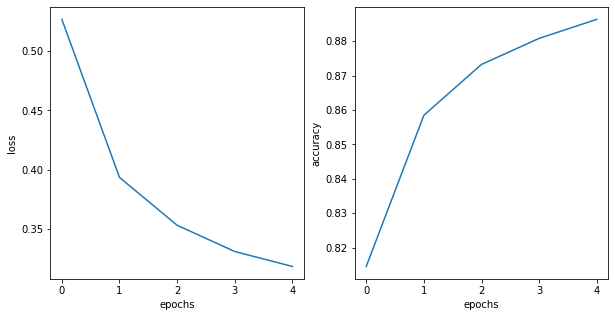

In [ ]:
print(history.history.keys())

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

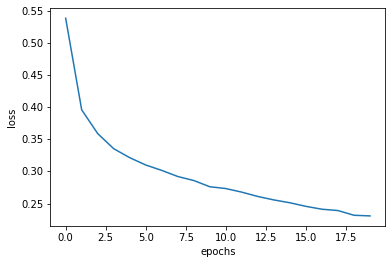

In [ ]:
model=model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(train_scaled,train_target,epochs=20,verbose=0)

plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

* epochs 5-->20 늘림
* 손실이 잘 감소하지만 과연 훈련이 잘된걸까??
* 에포크에 따른 과대/과소 적합을 확인하려면 훈련세트뿐만아니라 검증세트에 대한 점수도 필요함
# 검증 손실

In [ ]:
model=model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(train_scaled,train_target,epochs=20,verbose=0,
                  validation_data=(val_scaled,val_target))

* 에포크마다 검증 손실을 계산하기위해 fit() 메서드에 검증 데이터를 전달할 수 있다.


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


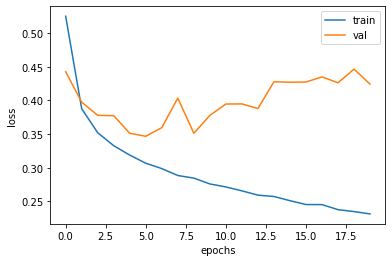

In [ ]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

* 훈련 손실은 꾸준히 감소하기때문에 전형적인 **과대적합** 모델 이다.
* 검증 손실이 상승하는 시점을 최대한 늦추면 good!

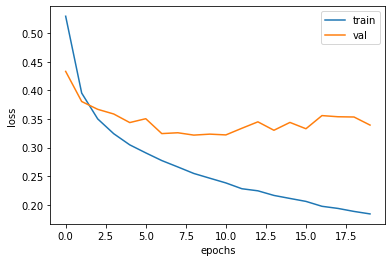

In [ ]:
model=model_fn()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(train_scaled,train_target,epochs=20,verbose=0,
                  validation_data=(val_scaled,val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

* 과대적합을 줄이기위해 optimizer 설정 (RMSprop --> Adam)
* Adam은 적응적 학습률을 사용
# 드롭아웃

훈련과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 과대적합을 막는다.

In [ ]:
model=model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


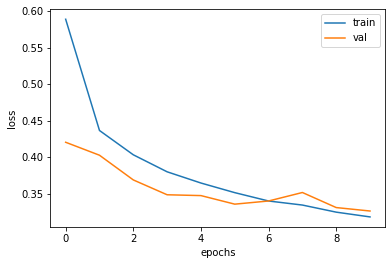

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(train_scaled,train_target,epochs=10,verbose=0,validation_data=(val_scaled,val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

* good!

In [ ]:
# 훈련된 모델의 파라미터를 저장하는 save_weights()
model.save_weights('model-weights.h5')

# 모델 구조와 모델 파라미터를 함께 저장하는 save()
model.save('model-whole.h5')

# 파일이 잘 만들어졌는지 확인
!ls -al *.h5

-rw-r--r-- 1 root root 333272 Feb  4 12:58 model-weights.h5
-rw-r--r-- 1 root root 982568 Feb  4 12:58 model-whole.h5


## 실험1: 훈련하지 않은 새로운 모델에 model-weights.h5 파일의 훈련된 모델 파라미터 사용하기

In [ ]:
model=model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

* save_weights - load_weights

In [ ]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled),axis=-1)
print(np.mean(val_labels == val_target))

0.8819166666666667


* 검증 정확도 확인 
* val 크기 (12000,10) 2차원
* axis=-1 마지막차원은 1이기때문에 axis=1과 동일한 역할
* val_label과 val_target이 같다면!! 평균하여 정확도를 측정함

# 실험2: 모델 전체를 model-whole.h5 파일에서 읽은 후 정확도 출력하기

In [ ]:
model= keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3263 - accuracy: 0.8819


[0.3263416886329651, 0.8819166421890259]

# 콜백

In [ ]:
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

checkpoint_cb=keras.callbacks.ModelCheckpoint('best-model.h5',save_best_only=True)

model.fit(train_scaled,train_target,epochs=20,verbose=0,
          validation_data=(val_scaled,val_target),
          callbacks=[checkpoint_cb])

* ModelCheckpoint 클래스의 객체 checkpoint_cb를 만들고 fit() 메서드의 callbacks 매개변수에 리스트로 감싸서 전달한다.
* 모델 훈련 후 best-model.h5 파일에 최상의 검증 점수를 낸 모델이 저장된다.

In [ ]:
model=keras.models.load_model('best-model.h5')
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3229 - accuracy: 0.8798


[0.3228980302810669, 0.8798333406448364]

In [ ]:
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)

history = model.fit(train_scaled,train_target,epochs=20,verbose=0,
          validation_data=(val_scaled,val_target),
          callbacks=[checkpoint_cb,early_stopping_cb])

* 조기종료 : 과대적합이 되기전에 훈련을 미리 중지 

In [ ]:
print(early_stopping_cb.stopped_epoch)

7


* 7에포크에서 조기 종료  

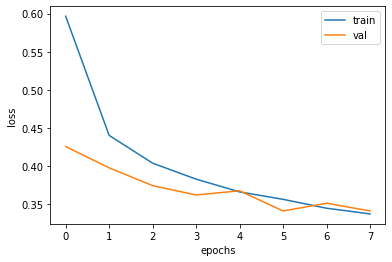

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3412 - accuracy: 0.8740


[0.3412383198738098, 0.8740000128746033]